# Candidates Countries for EU membership

The Europian Union consits of 28 member coutries [Members of the European Union](https://en.wikipedia.org/wiki/Member_state_of_the_European_Union#List). 
On the other hand, we still have European states that aren't members and they are on the road to EU membership. In alphabetical order, those coutries are:

1. Albania
2. (The former Yugoslav Republic) Macedonia
3. Montenegro
4. Serbia
5. Turkey

In my research I also included Croatia because it is the latest land which was accepted in Union. It can be useful for better understanding and analisys when it comes to candidate countries.
I was interested in development of these states for last fifteen years, so I found out appropriate dataset on [Data World Bank](http://www.worldbank.org/) and started to exploring it. In this project I was working with the latest dataset, which is available on [DataSet](http://data.worldbank.org/products/wdi)

Table of content:
1. [Data Preparation](https://nbviewer.jupyter.org/github/gospodjamicka/projects/blob/master/CandidatesCountriesforEU.ipynb#Data-Preparation)
2. [Birth Rate, Population and Unemployment](https://nbviewer.jupyter.org/github/gospodjamicka/projects/blob/master/CandidatesCountriesforEU.ipynb#Birth-Rate)
3. [Electricity consumption and CO2 Emission](https://nbviewer.jupyter.org/github/gospodjamicka/projects/blob/master/CandidatesCountriesforEU.ipynb#Electricity-consumption-and-CO2-Emission)
4. [Business, Agriculture and IT](https://nbviewer.jupyter.org/github/gospodjamicka/projects/blob/master/CandidatesCountriesforEU.ipynb#Business,-Agriculture-and-IT)
5. [Net bilateral aid flows from donors](https://nbviewer.jupyter.org/github/gospodjamicka/projects/blob/master/CandidatesCountriesforEU.ipynb#Net-bilateral-aid-flows-from-donors)
6. [Women position in society](https://nbviewer.jupyter.org/github/gospodjamicka/projects/blob/master/CandidatesCountriesforEU.ipynb#Women-position-in-society)
7. [Conclusion](https://nbviewer.jupyter.org/github/gospodjamicka/projects/blob/master/CandidatesCountriesforEU.ipynb#Conclusion)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7.0, 4.5)
plt.rcParams['font.size'] = 9
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0

pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data Preparation

In [2]:
f = pd.read_csv('./datasets/WDI_Data.csv', encoding='windows-1251')
f.columns = (i.replace(' ', '') for i in f.columns.values.tolist())

country = ['Albania', 'Croatia', 'European Union', 'Macedonia, FYR', 'Montenegro', 'Serbia', 'Turkey']
df = f.loc[f.CountryName.isin(country)].copy()
df.loc[df.CountryName == 'Macedonia, FYR', 'CountryName'] = 'Macedonia'
df.loc[df.CountryName == 'European Union', 'CountryName'] = 'EUU'

colors = {'Albania': '#348ABD',
          'Croatia': '#9E95D6',
          'EUU': '#777777',
          'Macedonia': '#E24D37',
          'Montenegro': '#64C1A4',
          'Serbia': '#FBC15E',
          'Turkey': '#8EBA42'}

columns = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode']
df2 = pd.melt(df, id_vars=columns, var_name='Year', value_name='Value')
df2.dropna(inplace=True)

df2['Year'] = df2['Year'].astype(int)
df2 = df2.loc[df2.Year.isin(range(2000,2017))]

def plot_aid(indicators):
    col = ['CountryName', 'IndicatorName', 'IndicatorCode', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    ind_stacked = df.loc[df.CountryName != 'EUU']
    ind_stacked = ind_stacked[col]
    
    ind_stacked = ind_stacked.fillna(0)
    label = []
    
    for key, color in colors.items():
        if key == 'EUU':
            continue
        label.append(key)
    label.sort()
        
    for indicator in indicators:
        ind_code = ind_stacked.loc[ind_stacked.IndicatorCode == indicator]
        
        index = np.arange(len(col[3:])) + 0.3
        bar_width = 0.8
        y_offset = np.array([0.0] * len(col[3:]))
        
        l = np.arange(len(ind_code)) #df length
        cl = np.arange(len(col[3:])) #column length
        years = []
        for j in cl:
            years.append(col[j+3])
            for i in l:
                c = colors[ind_code['CountryName'].iloc[i]]
                value = ind_code.iloc[i,j+3]/10000
                plt.bar(index[j], value, bar_width, bottom=y_offset[j], color=c)
                y_offset[j] += value
                plt.xticks(np.arange(len(col[3:])) + 0.6, years, rotation=90, horizontalalignment='left')
            title = ind_code['IndicatorName'].iloc[i]
        plt.title(title)
        plt.legend(label, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.grid(b=None, which='major', axis='x')
        plt.show()
        

def plot_ind(indicators):
    l = len(indicators)
    for indicator in indicators:
        fig, ax = plt.subplots()
        ind_code = df2.loc[df2.IndicatorCode == indicator]
        ind_name_country = ind_code.groupby(['IndicatorName', 'CountryName'])
        for name, values in ind_name_country:   
            ax.plot(values['Year'], values['Value'], label=name[1], color = colors[name[1]], linewidth = 2) 
            title = name[0]
            co2 = '(% of total fuel combustion)'
            if len(title) > 57 and co2 in title:
                ind = title.rfind(co2)
                title = title[0:ind]
            ax.set_title(title)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
        plt.tick_params(axis='x', which='both', bottom='on', top='off')        
        plt.tick_params(axis='y', which='both', left='on', right='off')
        plt.tight_layout()
        plt.show()  

### Birth Rate

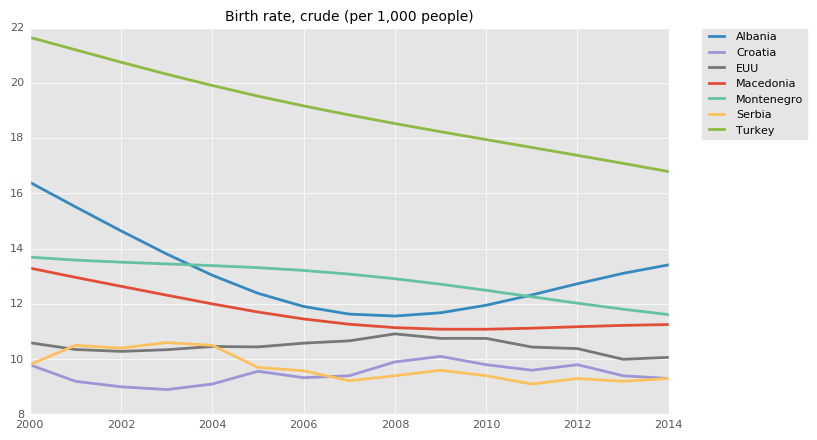

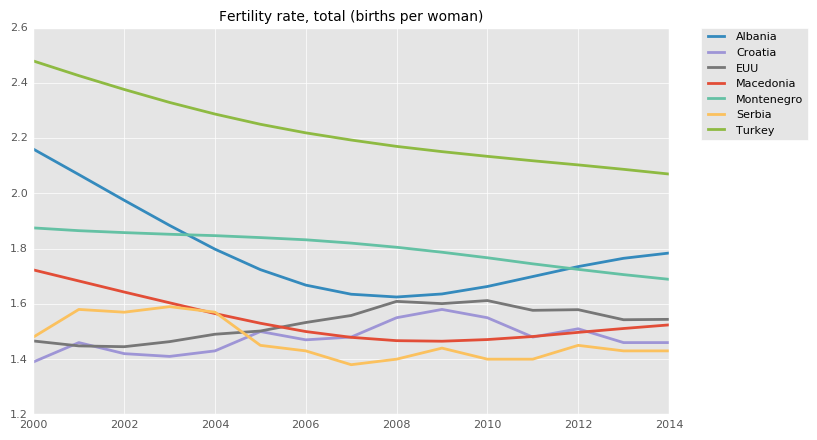

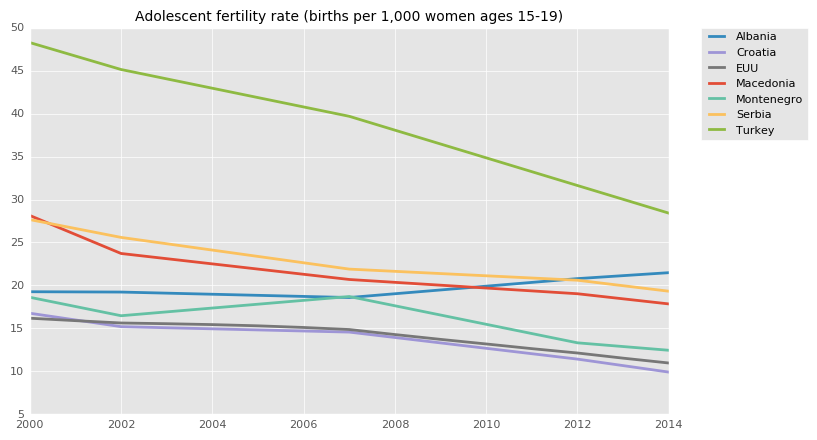

In [3]:
fertility_rate = ['SP.DYN.CBRT.IN', #Birth rate, crude (per 1,000 people)
                  'SP.DYN.TFRT.IN', #Fertility rate, total (births per woman)
                  'SP.ADO.TFRT'     #Adolescent fertility rate (births per 1,000 women ages 15-19)
                 ]
plot_ind(fertility_rate)

Statistics for birth and fertility rates, is generally very delicate for most countries in the world. These three diagrams represent nowadays situation world wide. It's obvious that birth and fertility rates are in decrease for all countries that are used for exploration. At first we can see that Turkey and Albania have these rates higher than EU avarage but there is decline in comparison with 2000's. However, data for Albania showing increasing for few last years. 

Secondly, diagram for Adolescent fertility rate is worrying for all states, especially in Turkey even though they made a evident progress on this issue.

# Population

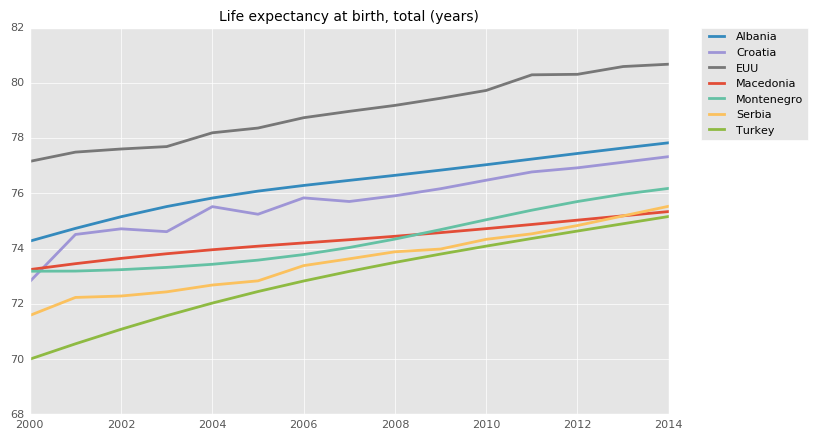

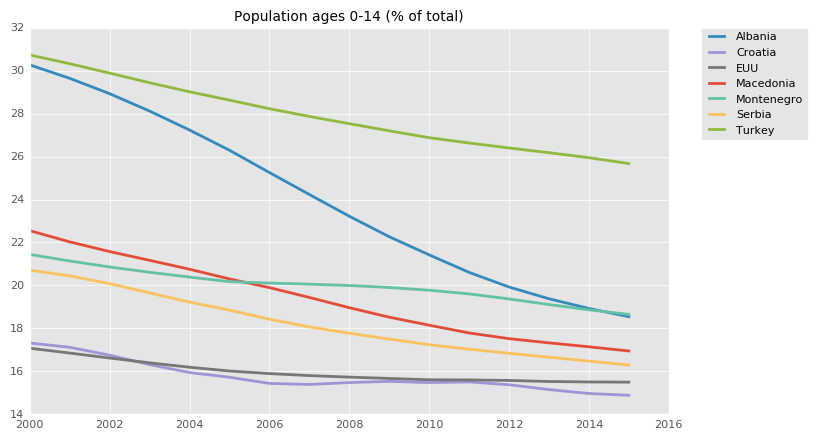

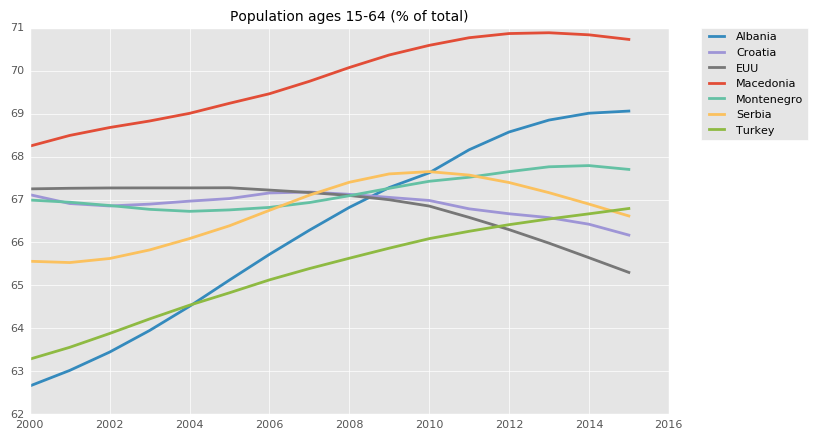

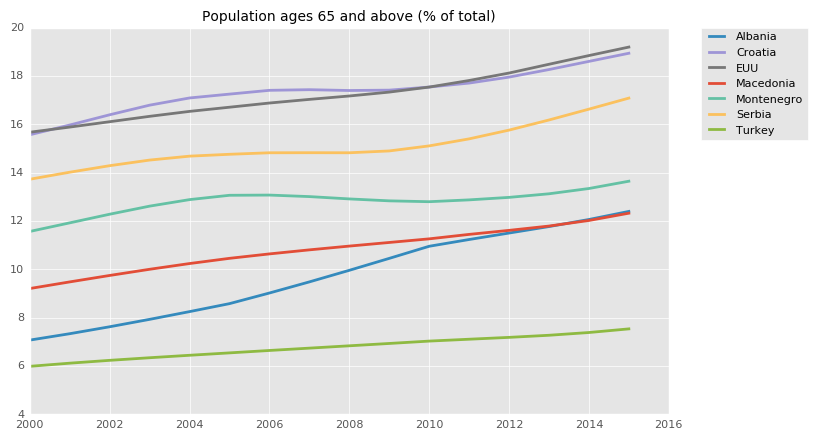

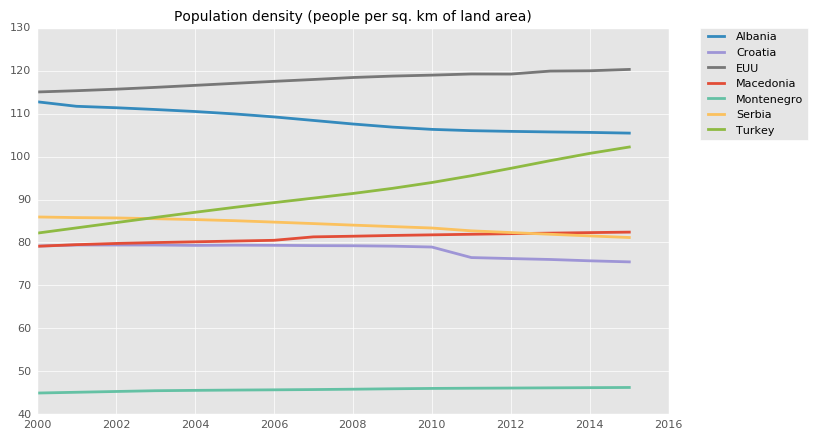

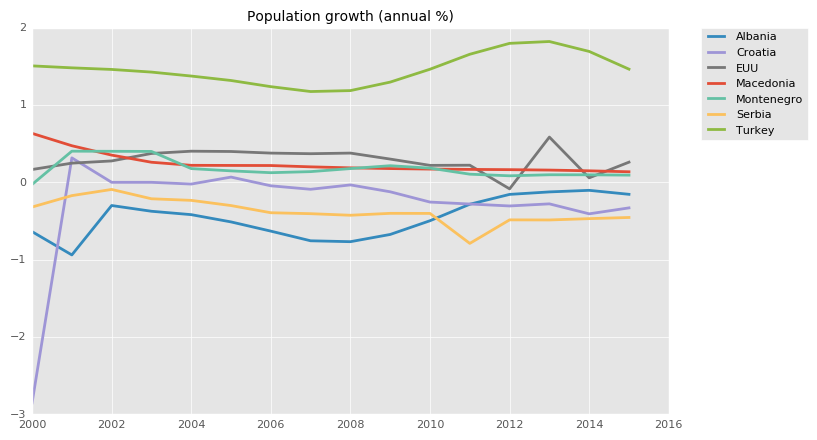

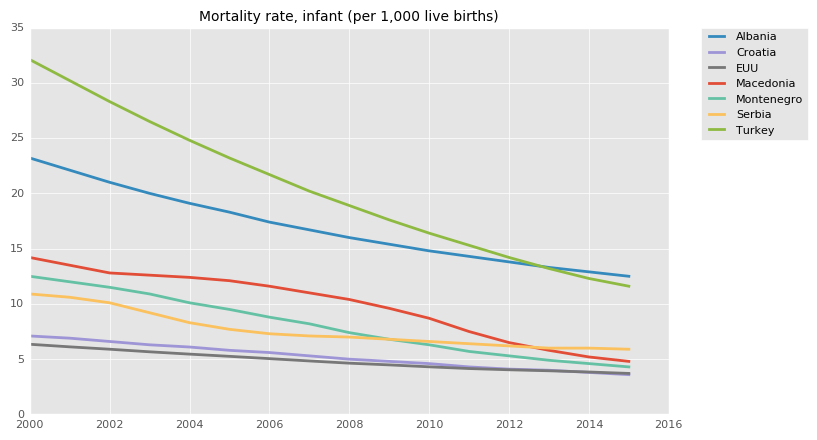

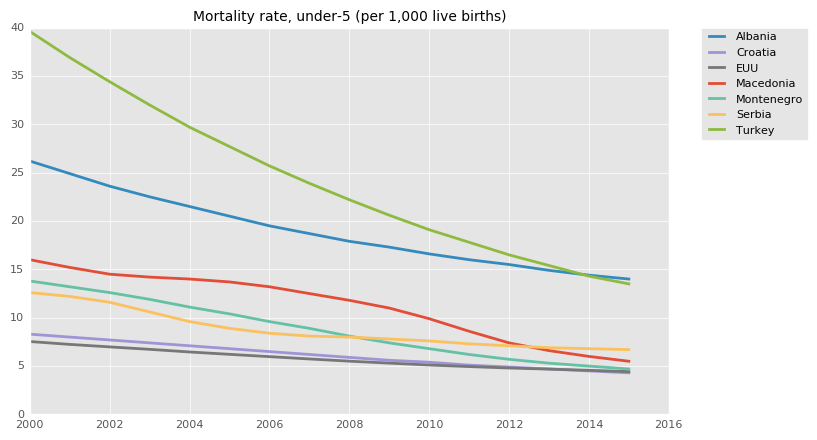

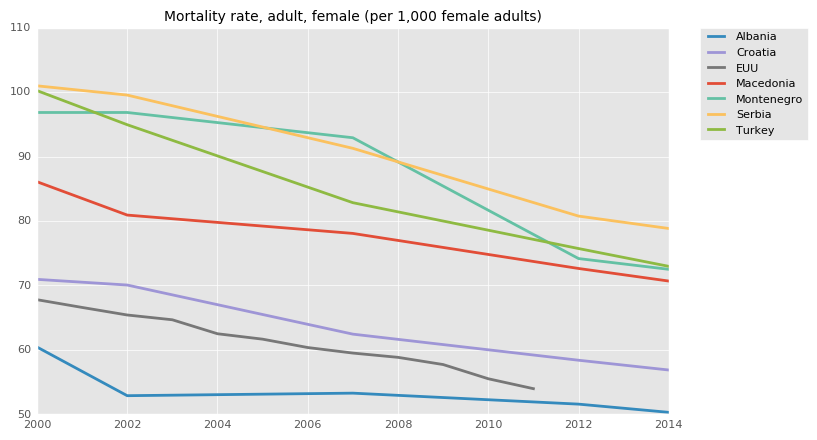

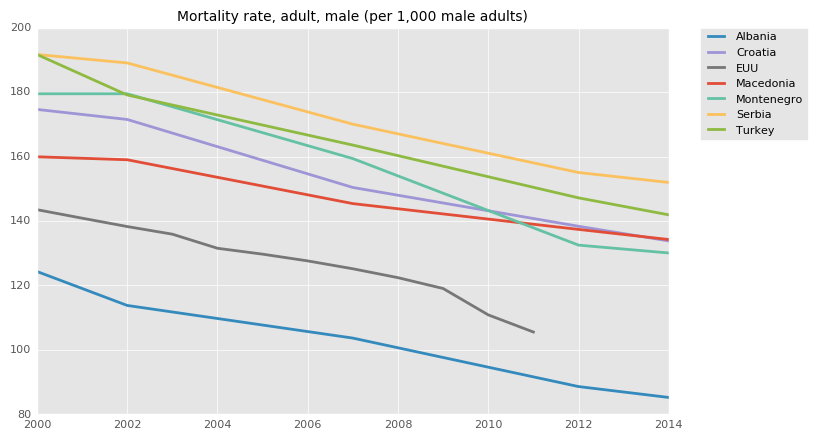

In [4]:
population = ['SP.DYN.LE00.IN',    #Life expectancy at birth, total (years)
              'SP.POP.0014.TO.ZS', #Population ages 0-14 (% of total)
              'SP.POP.1564.TO.ZS', #Population ages 15-64 (% of total)
              'SP.POP.65UP.TO.ZS', #Population ages 65 and above (% of total)
              'EN.POP.DNST',       #Population density (people per sq. km of land area)
              'SP.POP.GROW',       #Population growth (annual %)
              'SP.DYN.IMRT.IN',    #Mortality rate, infant (per 1,000 live births)
              'SH.DYN.MORT',       #Mortality rate, under-5 (per 1,000 live births)
              'SP.DYN.AMRT.FE',    #Mortality rate, adult, female (per 1,000 female adults)
              'SP.DYN.AMRT.MA'     #Mortality rate, adult, male (per 1,000 male adults)
             ]
plot_ind(population)

Life expectancy at birth is in increasing for all nationalities. EU average is eighty years while, this score for all other states is lower. 
When it comes to age range, Turkey, Albania and Montenegro have the greatest percent of children among other lands while Macedonia has huge percent of citizens who are old between fifteen and sixtyfour years. 
People from EU and Croatia are  the oldest nationalites but increasing in this field is obvious for all states. 
Turkey is the only region with rising in population especially in last few years. On the other hand, Serbia and Croatia have the lowest percent in population growth. 
Mortality rate in infancy and in childhood under five years are in falling off for all societies but Alabania and Turkey need a lot of improvements in this field. 
Similar situation is for mortality rates for adults, both female and male. Serbia and Turkey have the poorest score. 

# Unemployment

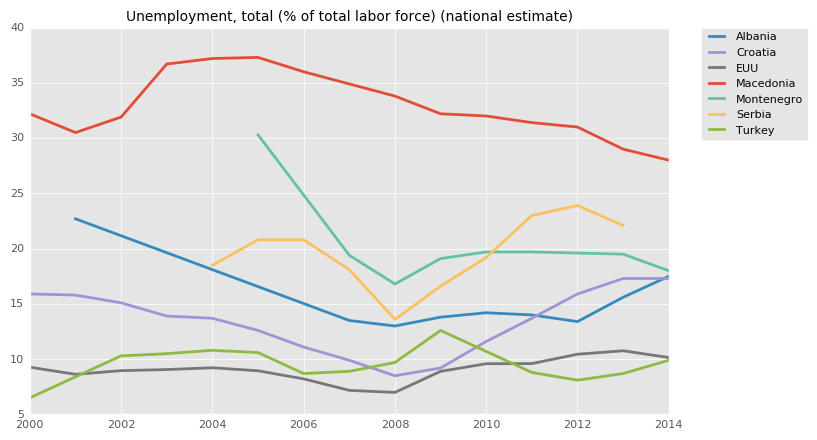

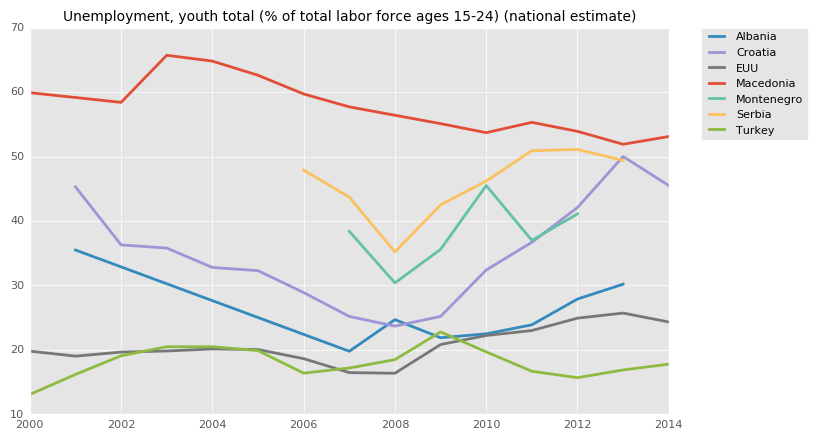

In [5]:
unemployment = ['SL.UEM.TOTL.NE.ZS', #Unemployment, total (% of total labor force) (national estimate)
                'SL.UEM.1524.NE.ZS'  #Unemployment, youth total (% of total labor force ages 15-24) (national estimate)
               ]
plot_ind(unemployment)

Unemployment is in growth during last few years in all states but percent of employed citizens is the lowest in Macedonia. Youth employment in Macedonia, Serbia and Croatia is also far away from EU youth employment. Surprisingly, young people in Turkey have better chances to find a job than youth in EU.

## Electricity consumption and CO2 Emission

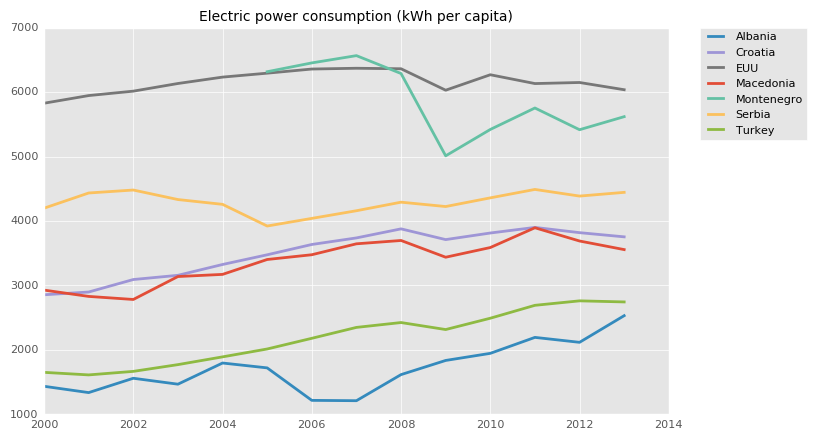

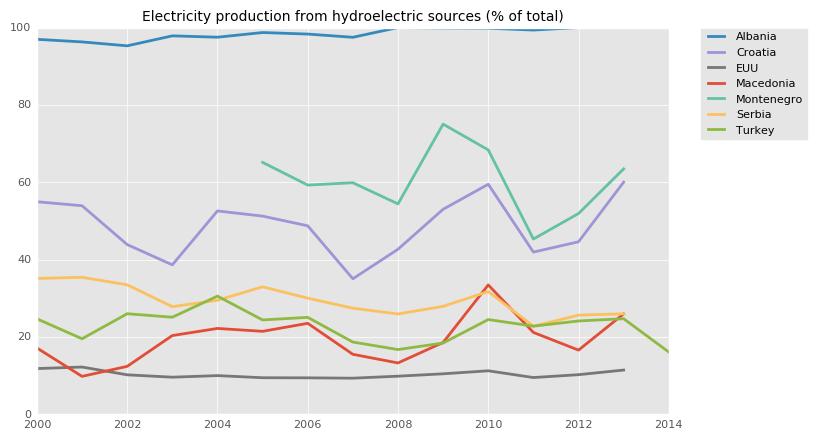

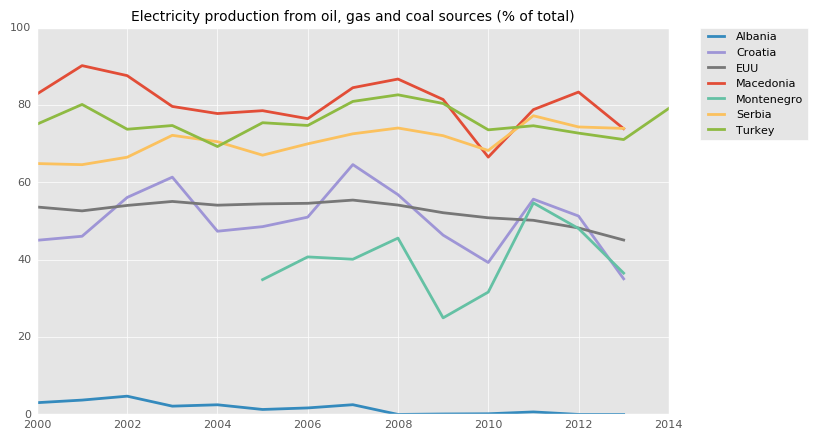

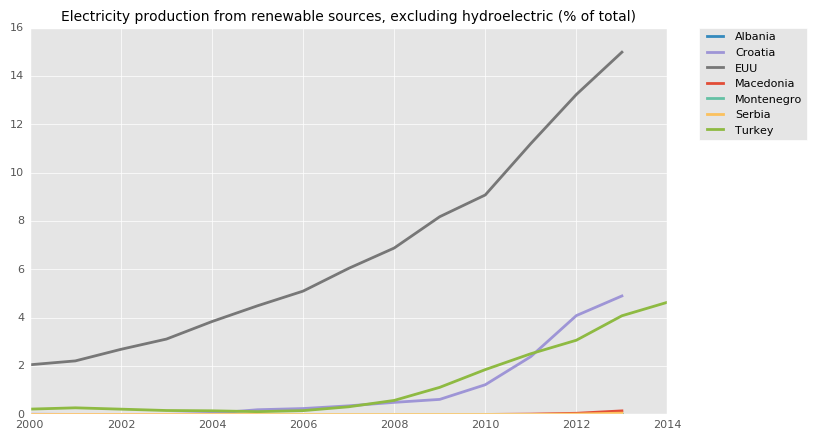

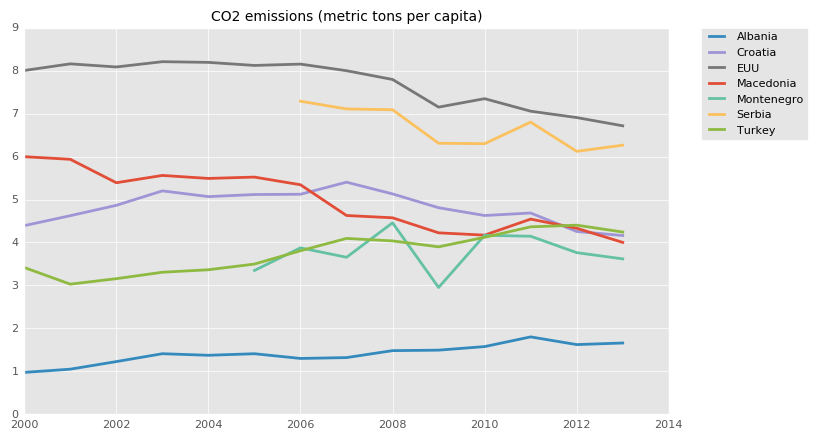

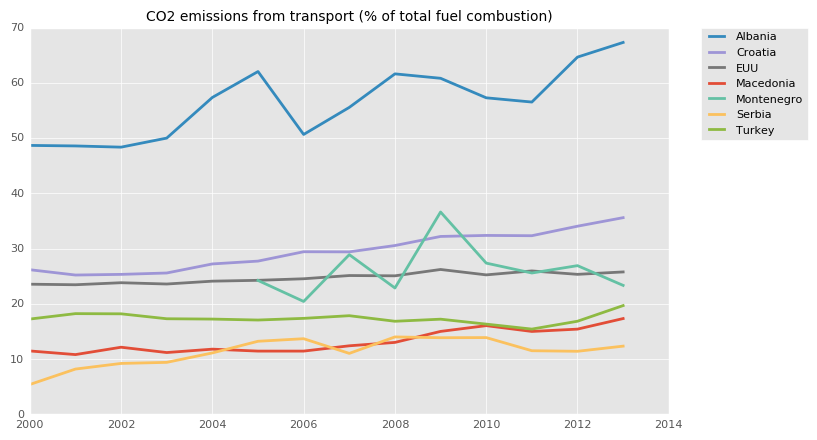

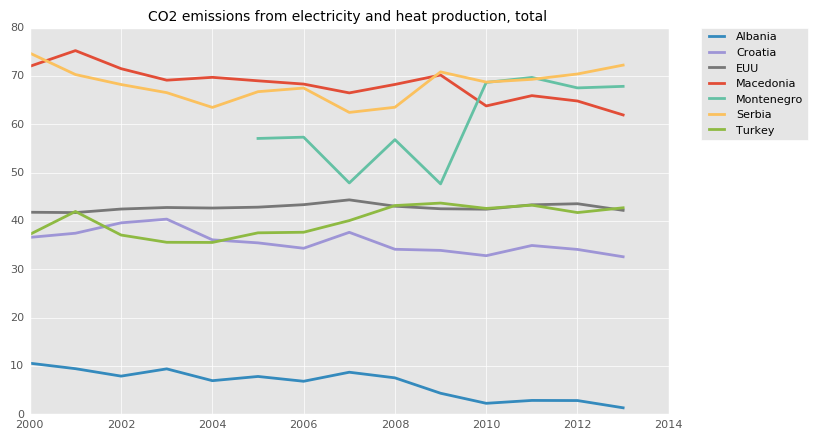

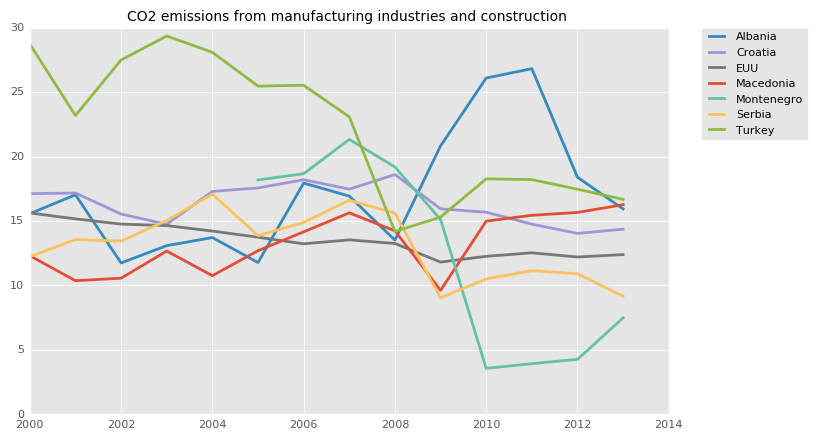

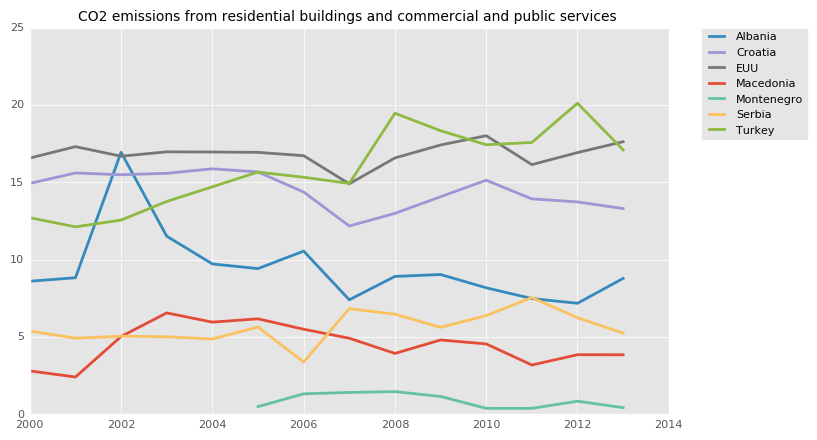

In [6]:
electric_power = ['EG.USE.ELEC.KH.PC', #Electric power consumption (kWh per capita)
                  #'EG.ELC.COAL.ZS',    #Electricity production from coal sources (% of total)
                  'EG.ELC.HYRO.ZS',    #Electricity production from hydroelectric sources (% of total)
                  'EG.ELC.FOSL.ZS',    #Electricity production from oil, gas and coal sources (% of total)
                  'EG.ELC.RNWX.ZS',    #Electricity production from renewable sources, excluding hydroelectric (% of total)
                 ]
plot_ind(electric_power)

co2_emissions = ['EN.ATM.CO2E.PC', #CO2 emissions (metric tons per capita)
                 'EN.CO2.TRAN.ZS', #CO2 emissions from transport (% of total fuel combustion)
                 'EN.CO2.ETOT.ZS', #CO2 emissions from electricity and heat production, total (% of total fuel combustion)
                 'EN.CO2.MANF.ZS', #CO2 emissions from manufacturing industries and construction (% of total fuel combustion)
                 'EN.CO2.BLDG.ZS', #CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)
                ]
plot_ind(co2_emissions)

Electric power consumption is in increasing for most EU candidates coutries, especially in Albania and Turkey but generaly, population from all these states use up less electricty than people from EU. 
Leader in electricity production from hydroelectronic sources is Albania, what is more 100% of their electicity comes from water. This kind of electricity production also makes big part in Croatia and Montenegro, whreas less than twenty percent of electricity production is made by EU. To conclude, this way of producing electricity is more important for all candidates countris than in EU. 
The biggest part of electricity production in Macedonia, Turkey and Serbia comes from oil, gas and coal sources. Albania is the only country who suppressed production from this origin. 
Moreover, electricity production from renewable sources is in rising in Croatia and Turkey but still far away from Europian production while all other states don't use AC derived from renewable sources. 
CO2 emission is on the highest level in EU and Serbia in comparion with other lands. Obviously, Albania has the lowest CO2 emission while other states are in the middle. 
Almost seventy percent of total fuel combustion was made by CO2 emission from transoprt in Albania. In other states situation is better. 
Now, CO2 emission from electricity and heating is huge in Serbia, Montenegro and Macedonia. Albania is the only country with lowest CO2 emission in this area, far away from EU average. 
CO2 emission from manufacturing industries and construction is the one of the most changhable parts when it comes to all coutries except EU. 

## Business, Agriculture and IT

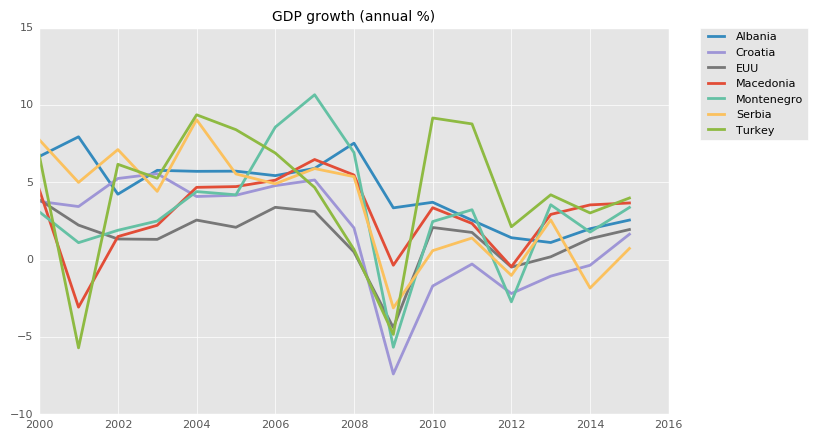

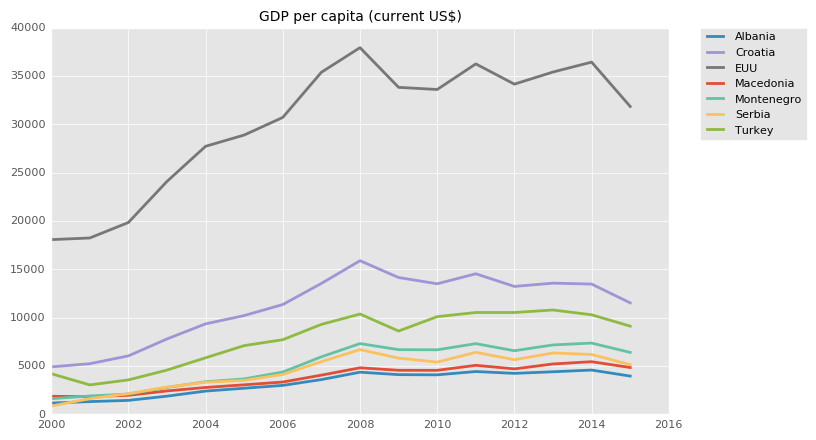

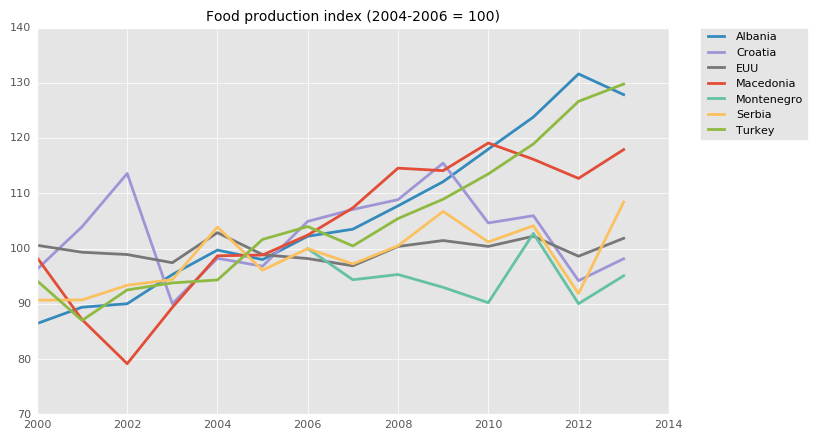

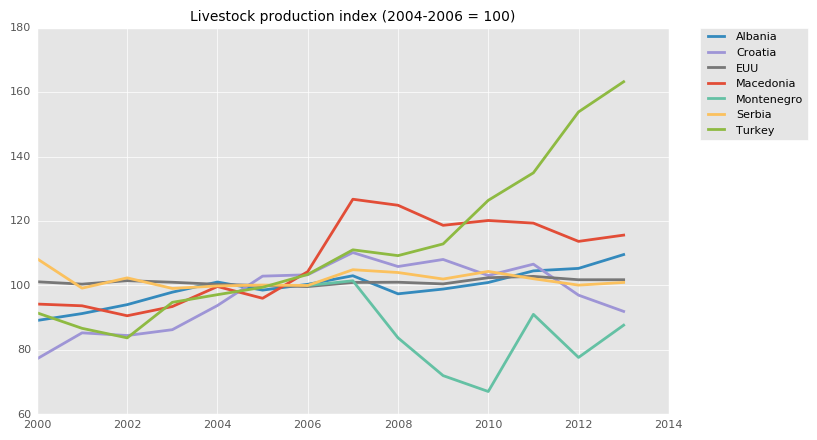

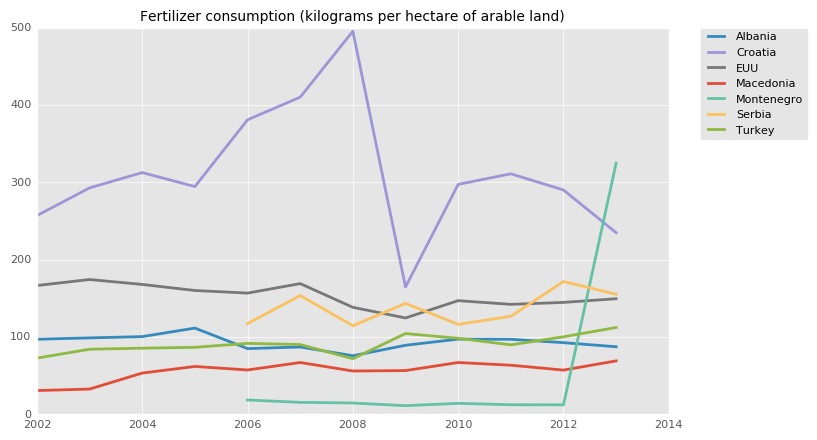

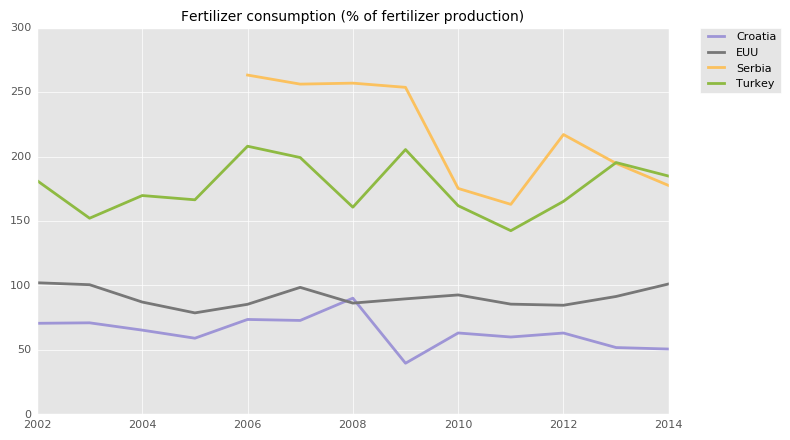

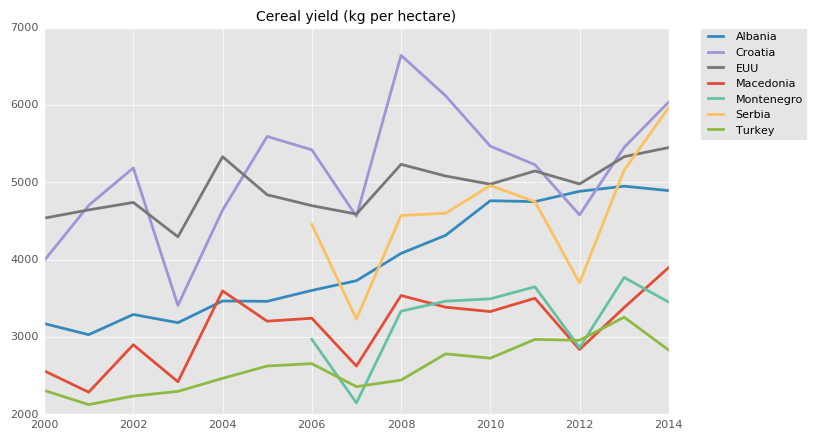

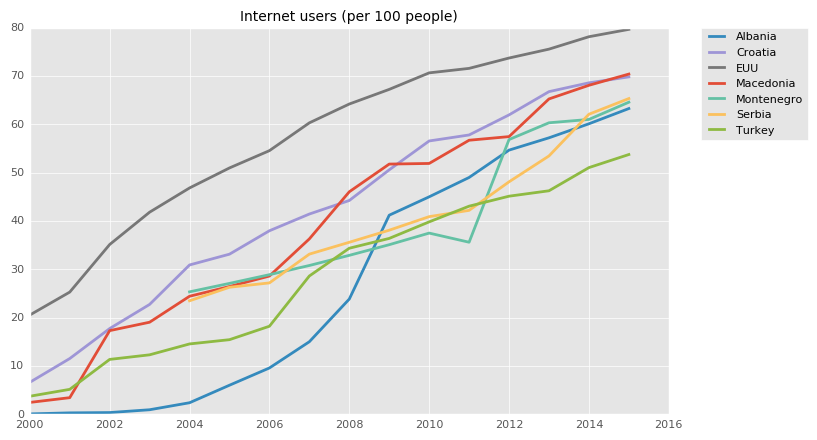

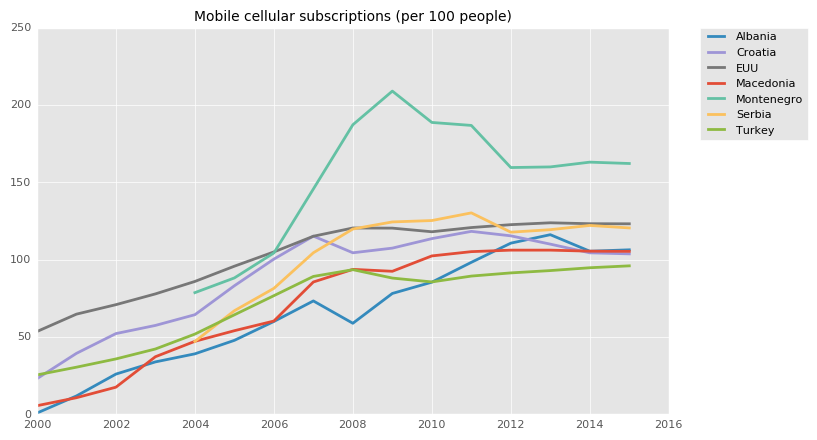

In [7]:
bussines = ['NY.GDP.MKTP.KD.ZG', #GDP growth (annual %)
            'NY.GDP.PCAP.CD'    #GDP per capita (current US$)
           ]
plot_ind(bussines)

agriculture = ['AG.PRD.FOOD.XD',    #Food production index (2004-2006 = 100)
               'AG.PRD.LVSK.XD',    #Livestock production index (2004-2006 = 100)
               'AG.CON.FERT.ZS',    #Fertilizer consumption (kilograms per hectare of arable land)
               'AG.CON.FERT.PT.ZS', #Fertilizer consumption (% of fertilizer production)
               'AG.YLD.CREL.KG'     #Cereal yield (kg per hectare)
              ]
plot_ind(agriculture)

it = ['IT.NET.USER.P2', #Internet users (per 100 people)
      'IT.CEL.SETS.P2'  #Mobile cellular subscriptions
     ]
plot_ind(it) 

Value for GDP growth (annual) in all coutries has been vary variable since 2000's. It had the lowest value in all states, in 2009 due to financial crisis and from then it is in rising in most cases. 
GDP per capita shows huge improvement during fifteen years in all states but besides that all coutries are far away from Europian results. 
Number of start-up procedures to register a business in in contsant falling. Macedonia made the biggest progress in this field. Maybe other countries should implement the same laws and rules in order to attract more investitors and make population more likely to start a business.  
In 2006 Serbia made enourmous development in time(days) for export-import. They decreased days for export-import for more than a third.
Data for food production index are variable, probably because of unstable weather conditions.
Turkey is the only country which is doubled livestock production index and it's still in increase. 

# Net bilateral aid flows from donors 

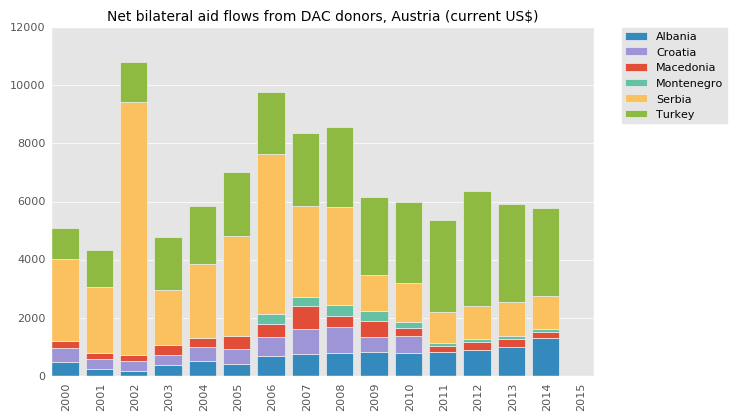

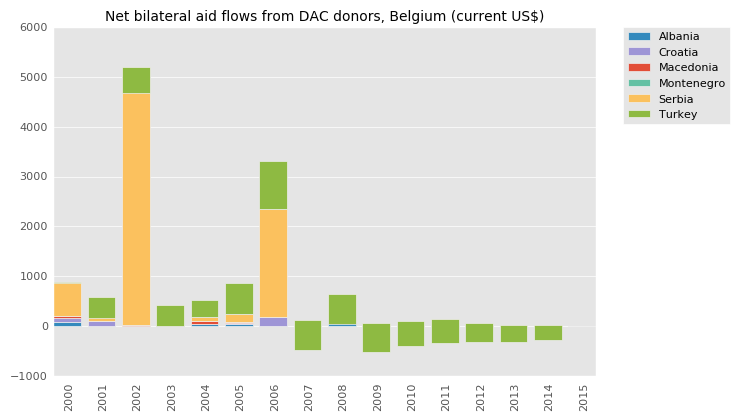

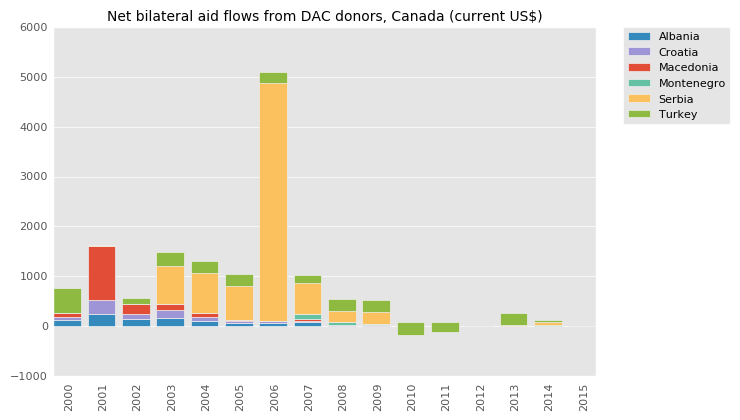

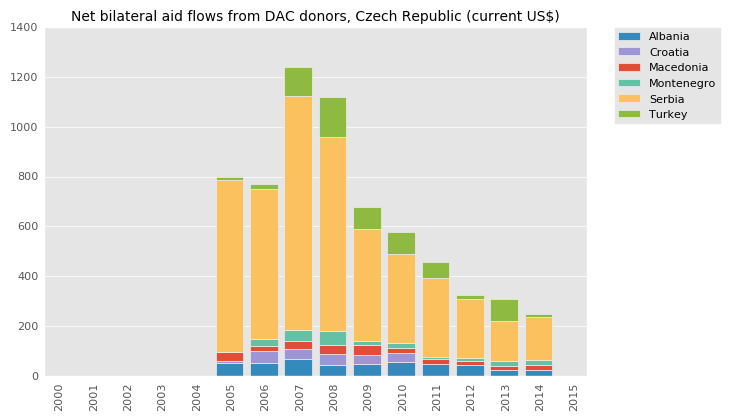

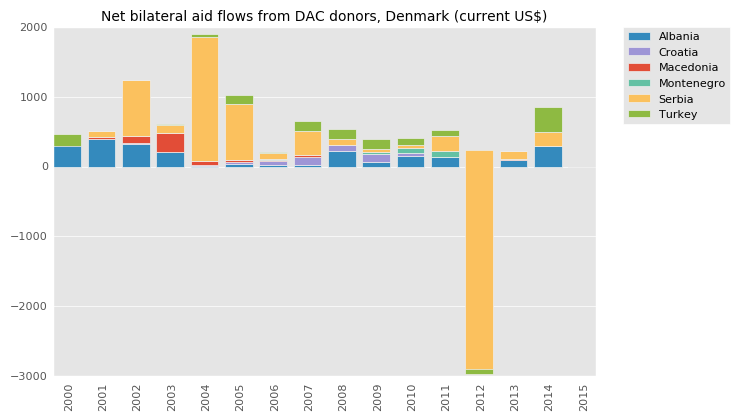

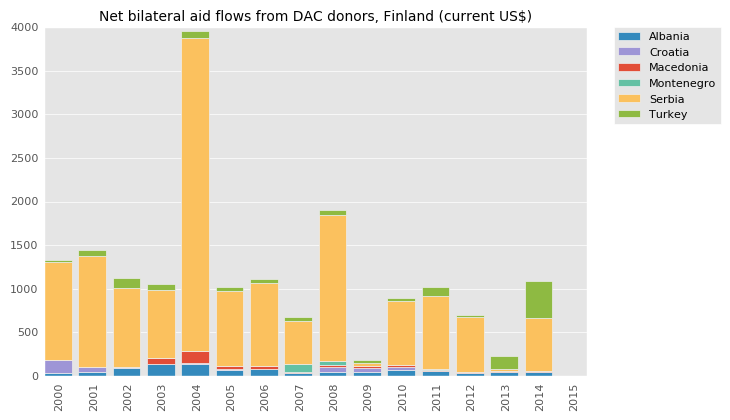

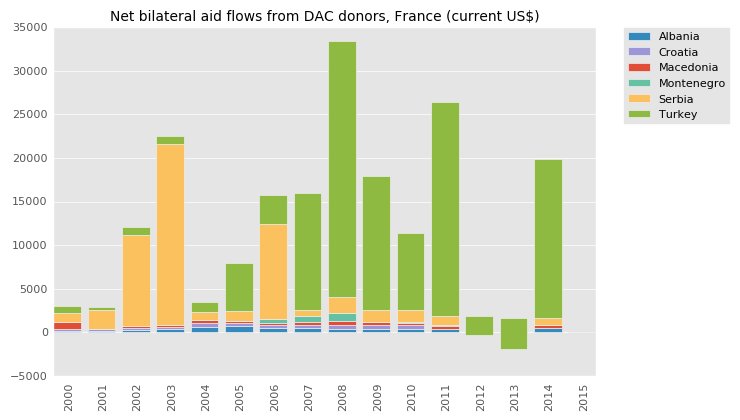

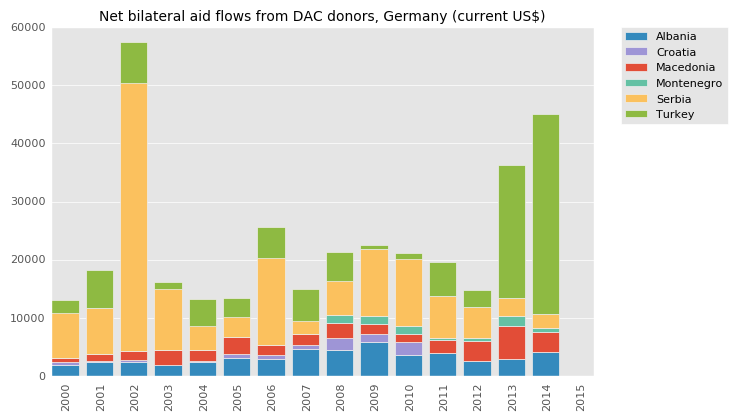

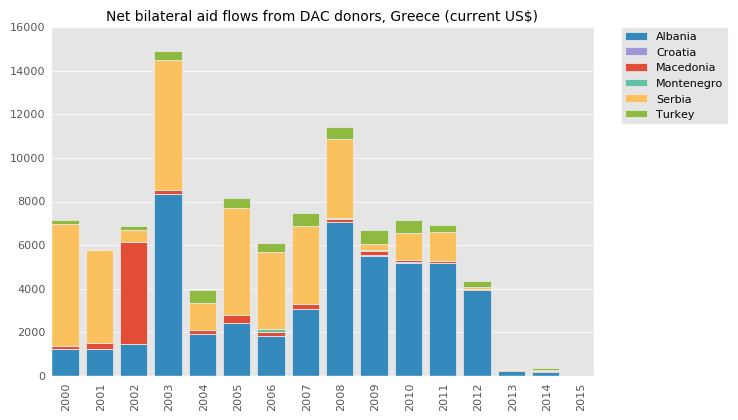

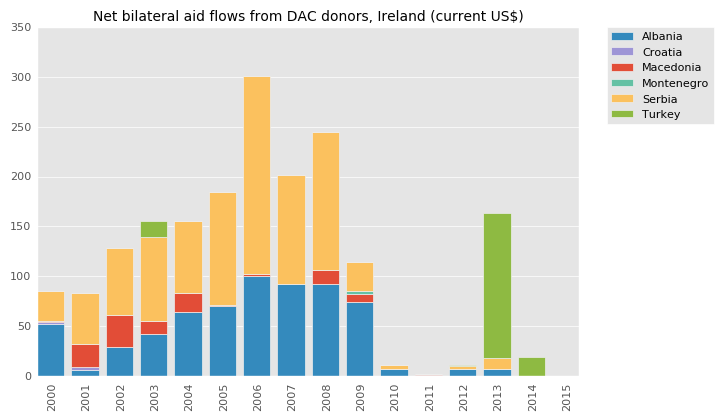

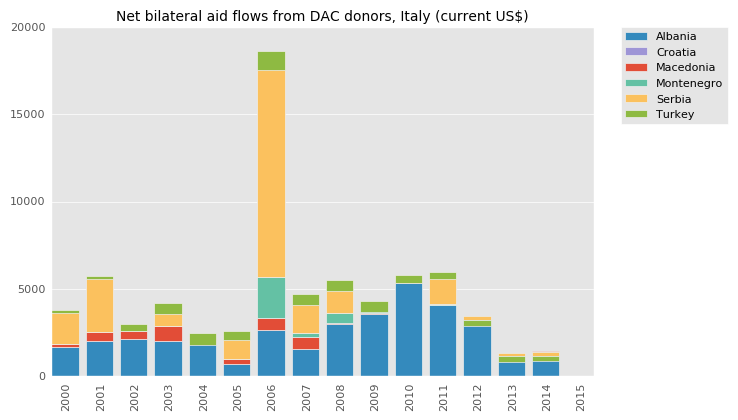

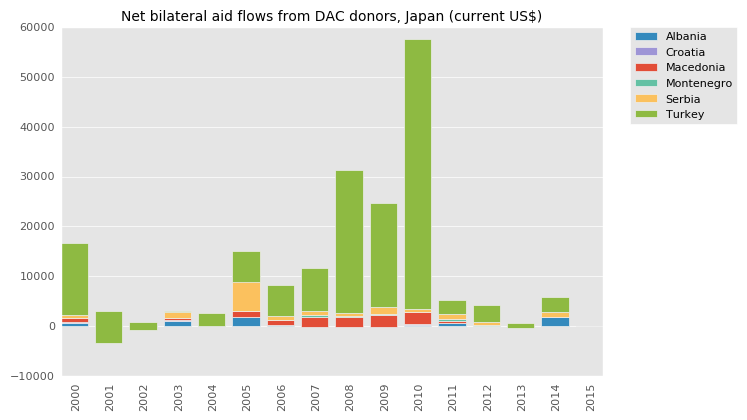

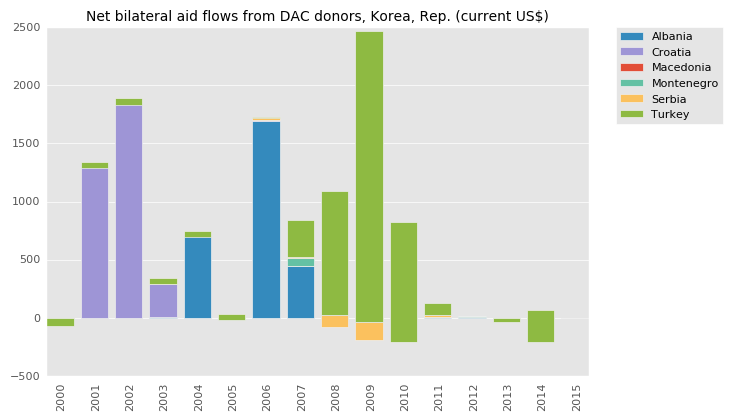

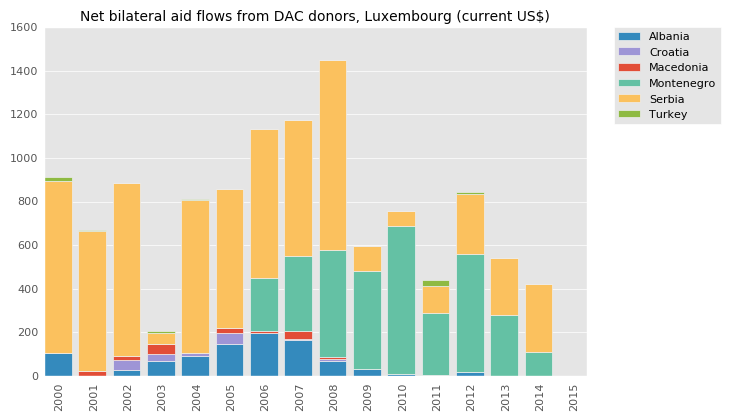

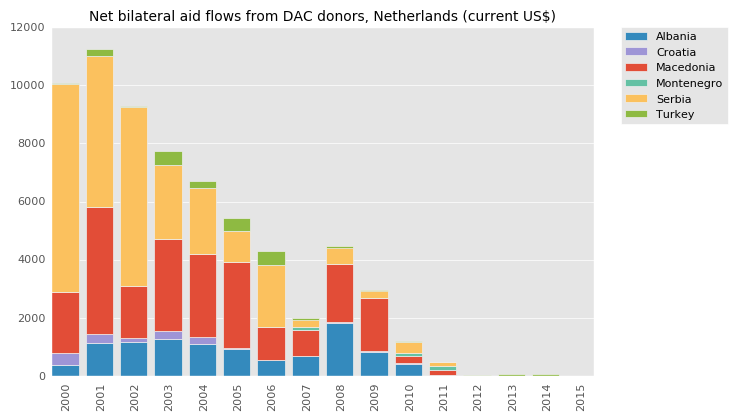

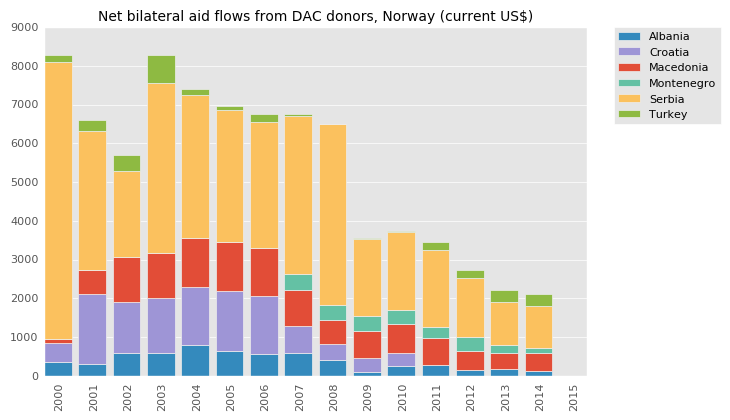

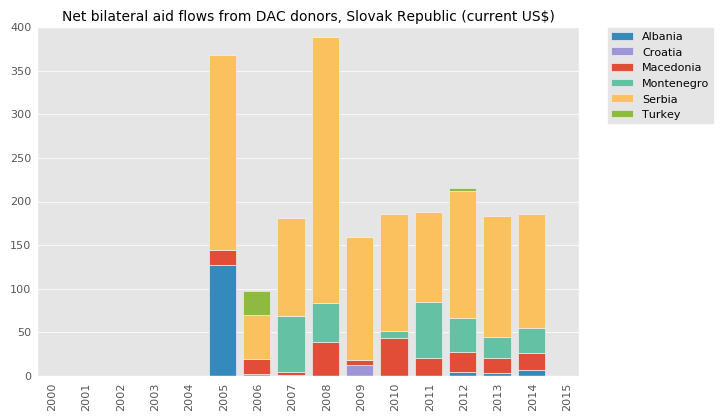

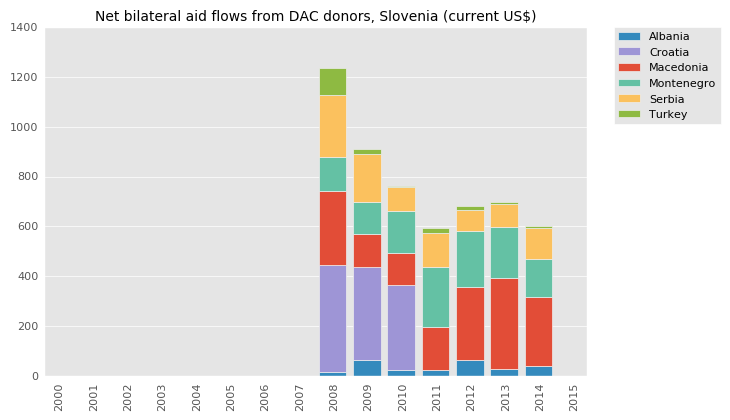

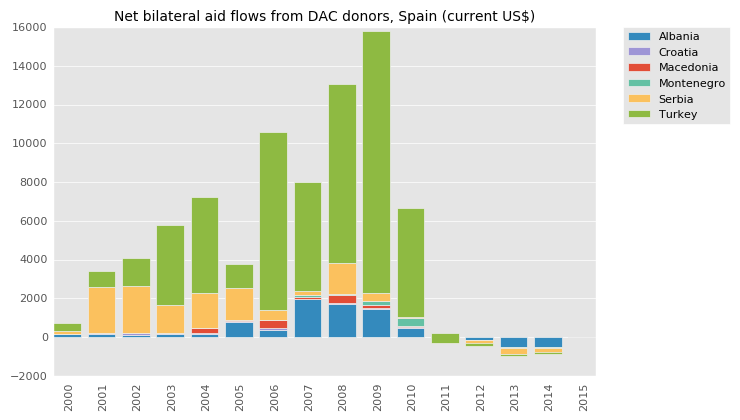

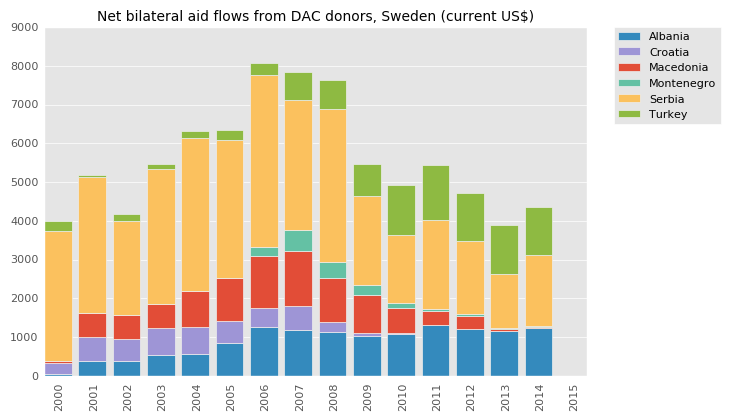

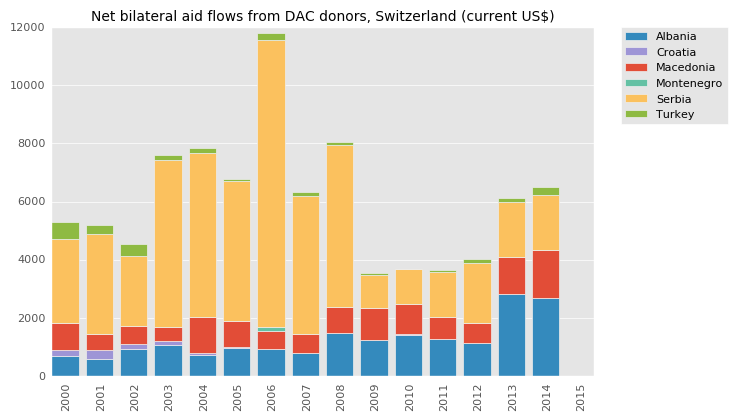

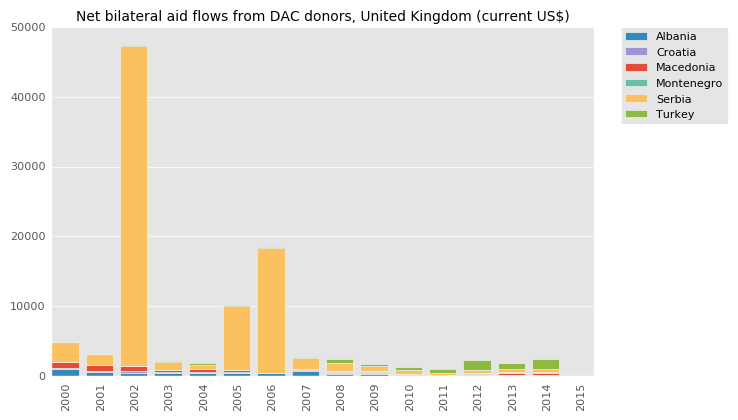

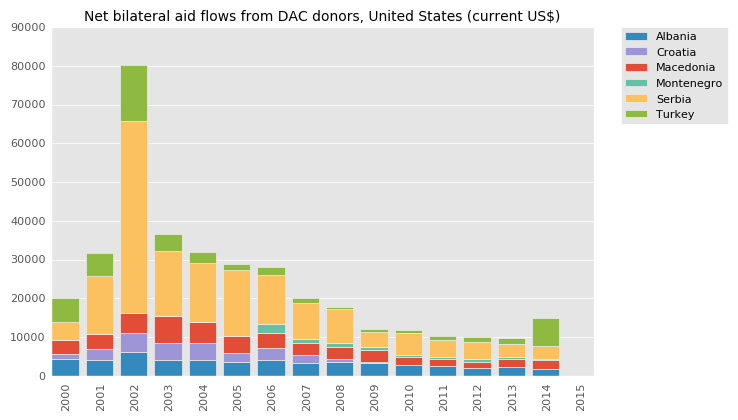

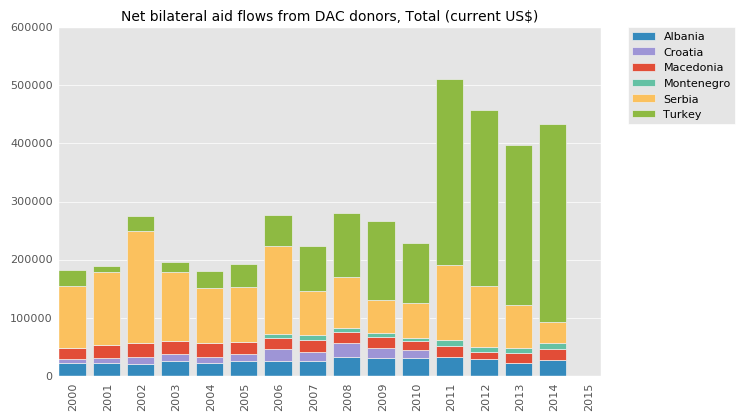

In [8]:
net_aid = ['DC.DAC.AUTL.CD', #Net bilateral aid flows from DAC donors, Austria (current US$)
           'DC.DAC.BELL.CD', #Net bilateral aid flows from DAC donors, Belgium (current US$)
           'DC.DAC.CANL.CD', #Net bilateral aid flows from DAC donors, Canada (current US$)
           'DC.DAC.CZEL.CD', #Net bilateral aid flows from DAC donors, Czech Republic (current US$)
           'DC.DAC.DNKL.CD', #Net bilateral aid flows from DAC donors, Denmark (current US$)
           'DC.DAC.FINL.CD', #Net bilateral aid flows from DAC donors, Finland (current US$)
           'DC.DAC.FRAL.CD', #Net bilateral aid flows from DAC donors, France (current US$)
           'DC.DAC.DEUL.CD', #Net bilateral aid flows from DAC donors, Germany (current US$)
           'DC.DAC.GRCL.CD', #Net bilateral aid flows from DAC donors, Greece (current US$)
           'DC.DAC.IRLL.CD', #Net bilateral aid flows from DAC donors, Ireland (current US$)
           'DC.DAC.ITAL.CD', #Net bilateral aid flows from DAC donors, Italy (current US$)
           'DC.DAC.JPNL.CD', #Net bilateral aid flows from DAC donors, Japan (current US$)
           'DC.DAC.KORL.CD', #Net bilateral aid flows from DAC donors, Korea (current US$)
           'DC.DAC.LUXL.CD', #Net bilateral aid flows from DAC donors, Luxembourg (current US$)
           'DC.DAC.NLDL.CD', #Net bilateral aid flows from DAC donors, Netherlands (current US$)
           'DC.DAC.NORL.CD', #Net bilateral aid flows from DAC donors, Norway (current US$)
           'DC.DAC.SVKL.CD', #Net bilateral aid flows from DAC donors, Slovak Republic (current US$)
           'DC.DAC.SVNL.CD', #Net bilateral aid flows from DAC donors, Slovenia (current US$)
           'DC.DAC.ESPL.CD', #Net bilateral aid flows from DAC donors, Spain (current US$)
           'DC.DAC.SWEL.CD', #Net bilateral aid flows from DAC donors, Sweden (current US$)
           'DC.DAC.CHEL.CD', #Net bilateral aid flows from DAC donors, Switzerland (current US$)
           'DC.DAC.GBRL.CD', #Net bilateral aid flows from DAC donors, United Kingdom (current US$)
           'DC.DAC.USAL.CD', #Net bilateral aid flows from DAC donors, United States (current US$)
           'DC.DAC.TOTL.CD'  #Net bilateral aid flows from DAC donors, Total (current US$)   
          ]

plot_aid(net_aid)  

Serbia and Turkey are countries with the biggest share in net bilateral aid flows from donors. From 2011, Turkey became the most sponsored state due to Europian migrant crisis (https://en.wikipedia.org/wiki/European_migrant_crisis). However, Montenegro and Croatia are the less funded countries. 

# Women position in society

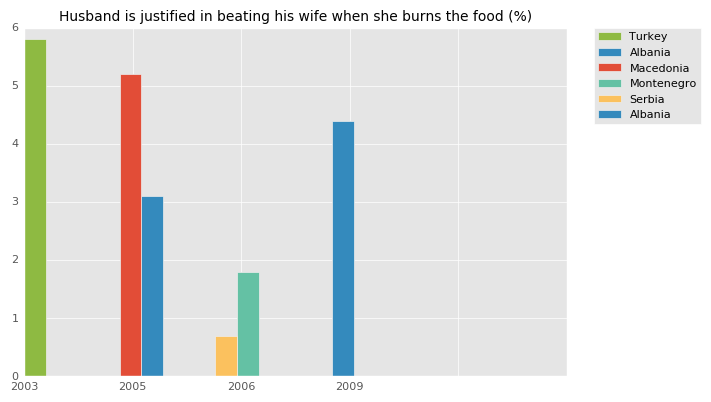

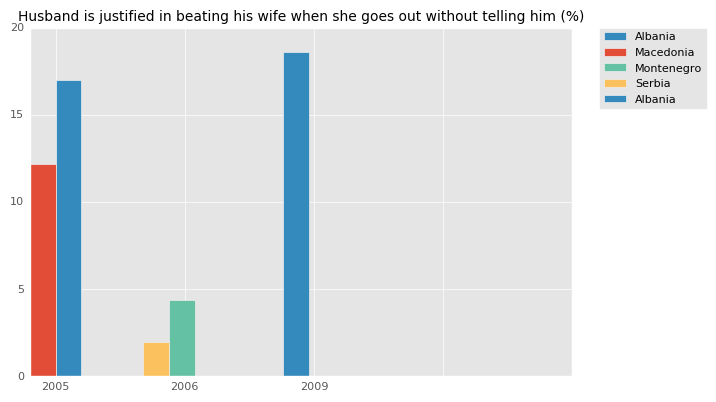

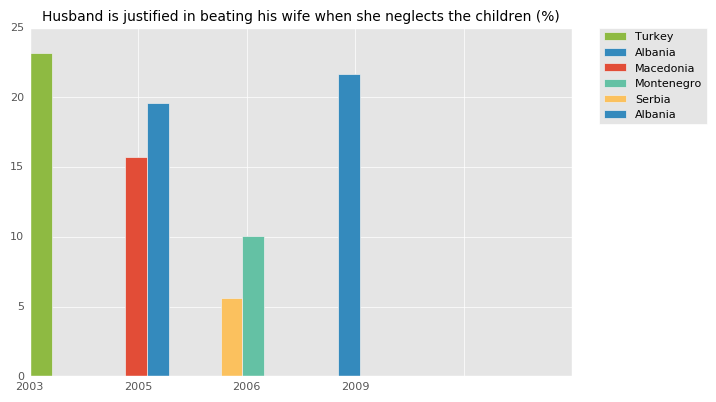

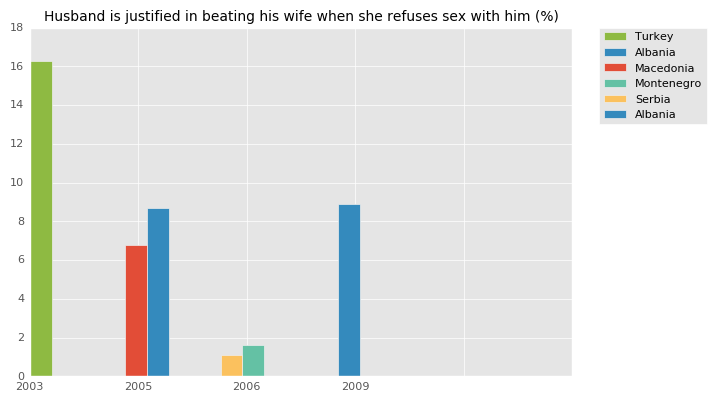

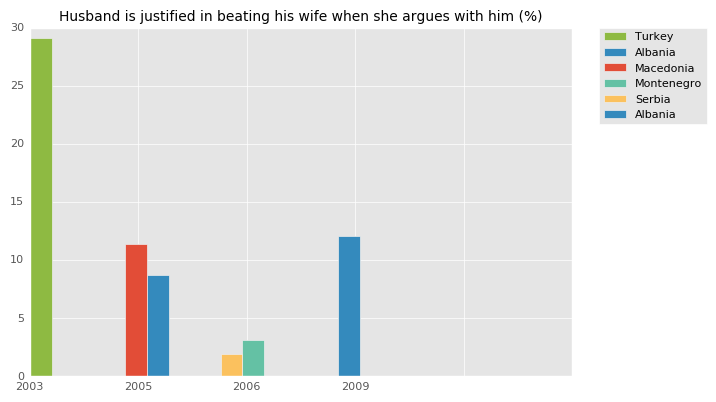

In [33]:
ind =['SG.VAW.BURN.ZS', 
      'SG.VAW.GOES.ZS',
      'SG.VAW.NEGL.ZS',
      'SG.VAW.REFU.ZS',
      'SG.VAW.ARGU.ZS'
     ]

def women(indicators):
    
    df_filtered = df2.loc[(df2.CountryName != 'EUU') | (df2.CountryName != 'Croatia')]
    
    for indicator in indicators:
        fig, ax = plt.subplots()
        ind_women = df_filtered.loc[df_filtered.IndicatorCode == indicator]
        l = 0
        bar_width = 0.2
        h = 1.08
        ha = 'left'
        for i in range(len(ind_women.Value)):
            country = ind_women.iloc[i].CountryName
            c = colors[country]
            ax.bar(l, ind_women.iloc[i].Value, width=bar_width, color=c, label=country)
            plt.xticks(range(len(ind_women.Year)), ind_women.Year.unique(), horizontalalignment=ha)
            title = ind_women.iloc[0].IndicatorName
            women = 'husband'
            if len(title) >= 88 and women in title:
                ind = title.rfind(women)
                title = str.capitalize(title[ind:len(title)])
            plt.title(title)
            if i < len(ind_women.Value)-1:
                if ind_women.iloc[i].Year == ind_women.iloc[i+1].Year:
                    l -= bar_width
                    ha = 'right'
                else:
                    l += h
                    ha = 'center'
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
        plt.show()

women(ind)

According to my research women from Serbia and Montengro are in better position than in other countries. Under these circumstances, women are the most vulnerable in Turkey and Albania. As a result, girls from all societies are the most threatened when they neglect theirs children. Therefore, all countries must pay more attention to this problem and provide more protection to their ladies.

# Conclusion

In most of these areas candidates countries are far away from EU average. They need a lot of improvements in fields which are directly related to their citizens. Diagrams about population and mortality give deeper and best insight how life looks like in those countries. Furthermore, unemployment(total) diagram is not so promissing for most countries. Diagrams about women positions give real picture of overall status in societies.

Having all these informations in mind, this journey is rather tough for all countries in the case that they realy want to progress further. Years that coming will be right the right indicators of their achievements.